In [42]:
import pandas as pd

df = pd.read_csv('AirQualityUCI.csv', sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [64]:
df.shape

(9471, 15)

In [22]:
df.columns[df.isnull().any()]

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [23]:
len(df[df.isnull().any(axis=1)])

9471

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


def barplot_missing(dataframe):
    missing_count = dataframe.isnull().sum()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_count.index, y=missing_count.values)
    plt.title('Missing values comparison')
    plt.xticks(rotation=90)
    plt.ylabel('Number of missing values')
    plt.xlabel('Column')
    plt.show()

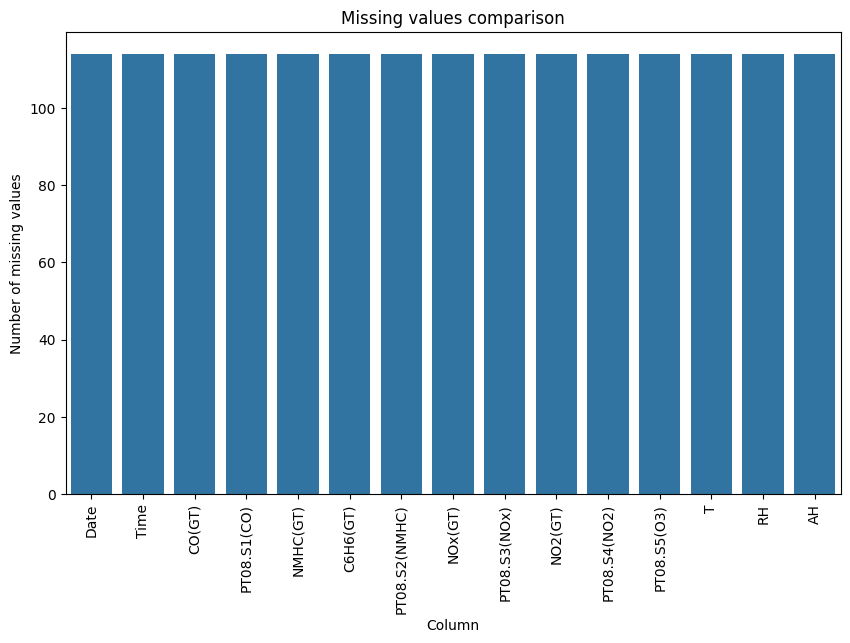

In [61]:
barplot_missing(df)

In [45]:
df = df.iloc[:, :-2]

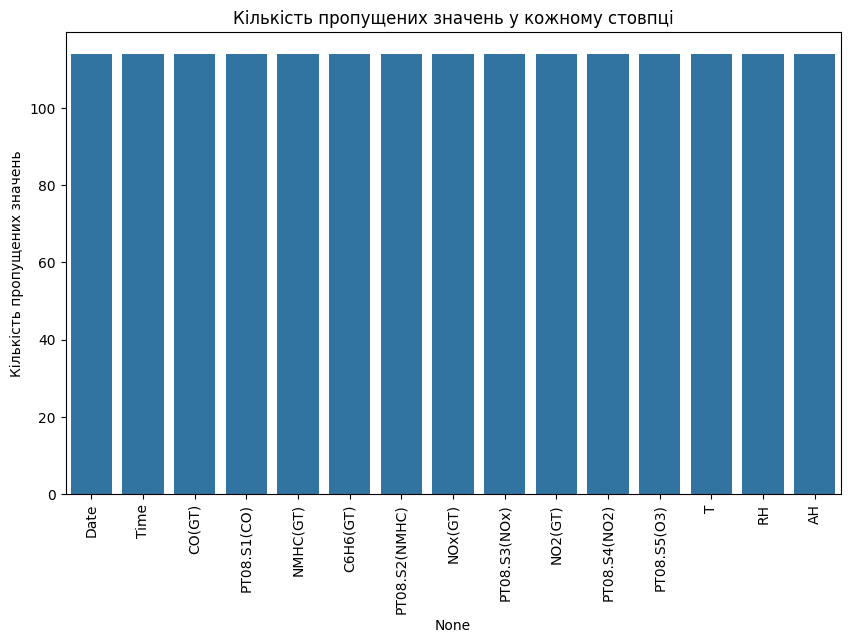

In [54]:
barplot_missing(df)

In [48]:
ozone_column = 'PT08.S5(O3)'

df_zero = df.copy()
df_mean = df.copy()
df_median = df.copy()

df_zero[ozone_column] = df_zero[ozone_column].fillna(0)
df_mean[ozone_column] = df_mean[ozone_column].fillna(df_mean[ozone_column].mean())
df_median[ozone_column] = df_median[ozone_column].fillna(df_median[ozone_column].median())

In [53]:
print(df_zero[ozone_column].isnull().sum(),
      df_mean[ozone_column].isnull().sum(),
      df_median[ozone_column].isnull().sum())

0 0 0


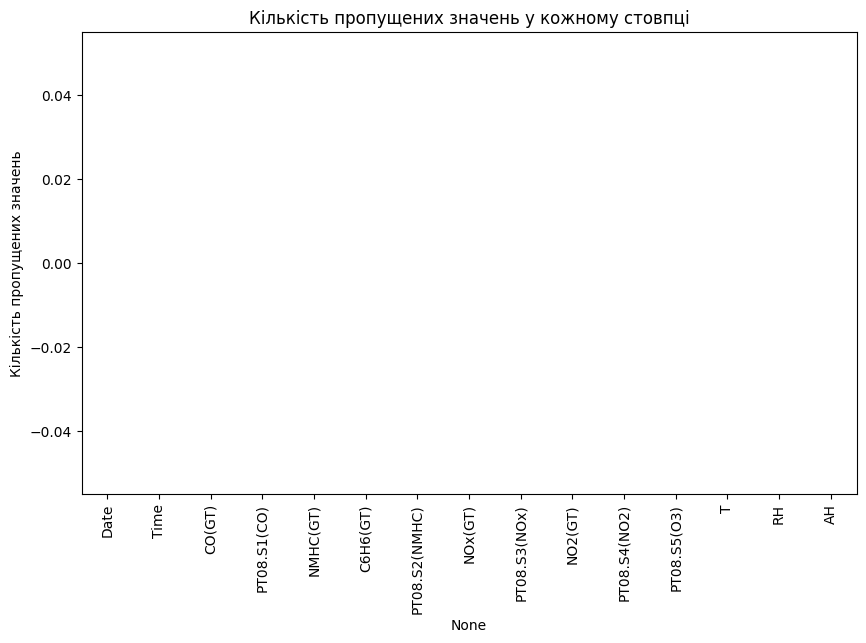

In [52]:
df_not_missing = df.dropna()
barplot_missing(df_not_missing)

In [69]:
df_zero[ozone_column].describe()

count    9471.000000
mean      963.335339
std       466.461811
min      -200.000000
25%       689.000000
50%       936.000000
75%      1250.000000
max      2523.000000
Name: PT08.S5(O3), dtype: float64

In [70]:
df_median[ozone_column].describe()

count    9471.000000
mean      974.673952
std       454.193863
min      -200.000000
25%       703.000000
50%       942.000000
75%      1250.000000
max      2523.000000
Name: PT08.S5(O3), dtype: float64

In [71]:
df_mean[ozone_column].describe()

count    9471.000000
mean      975.072032
std       454.179543
min      -200.000000
25%       703.000000
50%       949.000000
75%      1250.000000
max      2523.000000
Name: PT08.S5(O3), dtype: float64

In [67]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [68]:
df_not_missing.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


<Axes: >

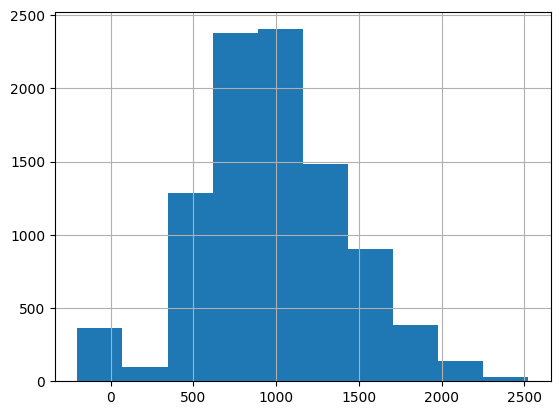

In [79]:
df_mean[ozone_column].hist()

<Axes: >

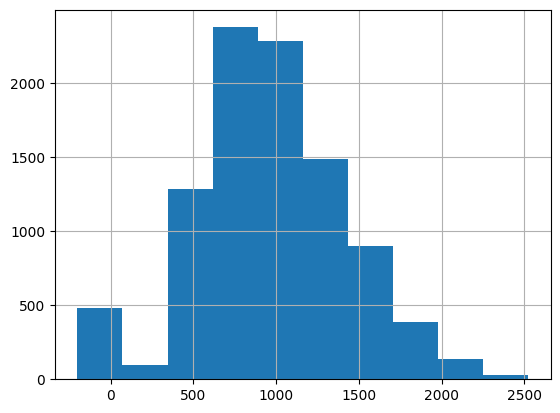

In [80]:
df_zero[ozone_column].hist()

<Axes: >

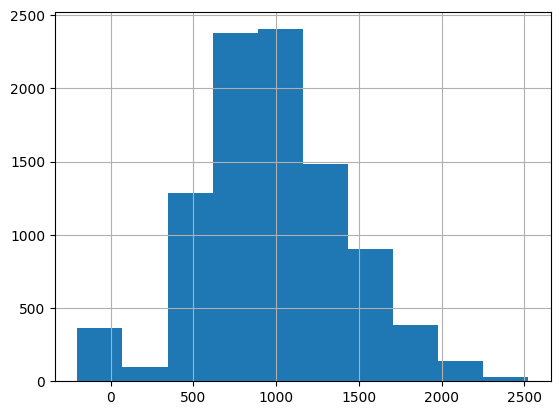

In [78]:
df_median[ozone_column].hist()

<Axes: >

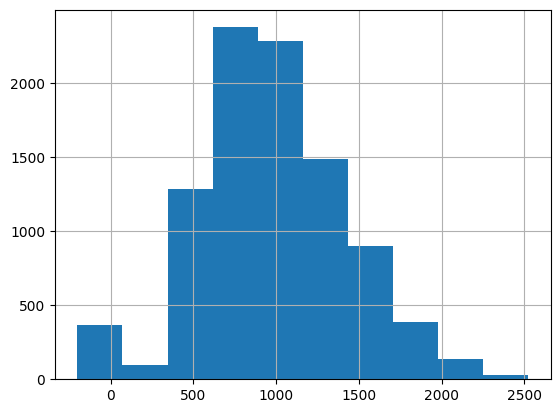

In [77]:
df_not_missing[ozone_column].hist()

<Axes: >

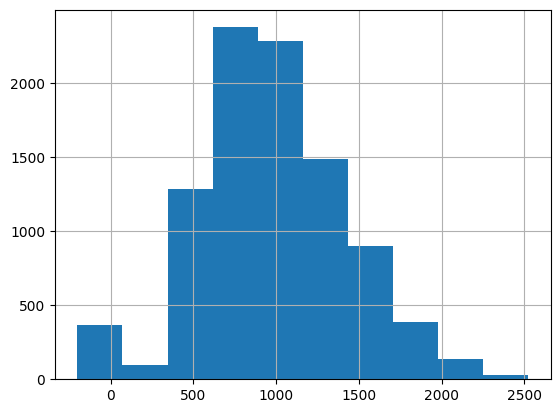

In [76]:
df[ozone_column].hist()